In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import load_img, img_to_array

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
epochs = 30

In [4]:
# データをつくる
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=90, width_shift_range=0.2, height_shift_range=0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [5]:
train_generator = train_datagen.flow_from_directory('../data/butterflyfish/train', target_size=(200,200),
                                                    batch_size=32, class_mode='binary')

Found 200 images belonging to 2 classes.


In [6]:
validation_generator = test_datagen.flow_from_directory('../data/butterflyfish/validation', target_size=(200,200),
                                                        batch_size=32, class_mode='binary')

Found 60 images belonging to 2 classes.


In [7]:
# モデルをつくる
model = Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [8]:
print(train_generator.class_indices)

{'oriental': 0, 'threadfin': 1}


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 64)        0         
__________

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
history = model.fit_generator(train_generator, epochs=epochs, verbose=1, validation_data=validation_generator)

Epoch 1/30
7/7 [==============================] - 3s 433ms/step - loss: 1.0590 - acc: 0.5064 - val_loss: 0.6898 - val_acc: 0.6167
Epoch 2/30
7/7 [==============================] - 1s 200ms/step - loss: 0.7022 - acc: 0.5208 - val_loss: 0.6921 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 1s 210ms/step - loss: 0.6823 - acc: 0.5695 - val_loss: 0.6945 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 2s 215ms/step - loss: 0.6920 - acc: 0.5000 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 2s 216ms/step - loss: 0.6800 - acc: 0.5000 - val_loss: 0.6904 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 2s 216ms/step - loss: 0.6880 - acc: 0.5064 - val_loss: 0.6885 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 1s 212ms/step - loss: 0.6698 - acc: 0.5589 - val_loss: 0.6740 - val_acc: 0.6333
Epoch 8/30
7/7 [==============================] - 2s 215ms/step - loss: 0.6640 - acc: 0.55

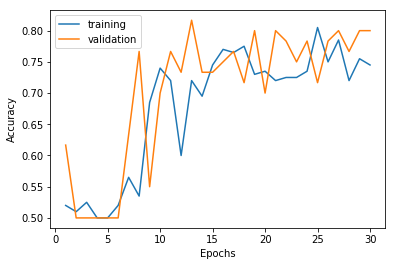

In [12]:
plt.plot(range(1, epochs+1), history.history['acc'], label="training")
plt.plot(range(1, epochs+1), history.history['val_acc'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

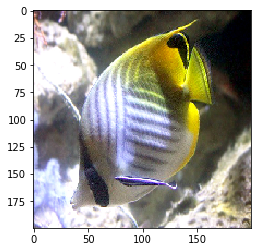

In [15]:
img = load_img("../data/originaldata/test.jpg", target_size=(200, 200))
plt.imshow(img)

In [16]:
array = img_to_array(img)
array /= 255
x = np.expand_dims(array, axis=0)
pred = model.predict(x)
print(pred[0])
if pred[0] >= 0.5:
    print('トゲチョウチョウウオです')
else:
    print('チョウチョウウオです')

[0.9489706]
トゲチョウチョウウオです


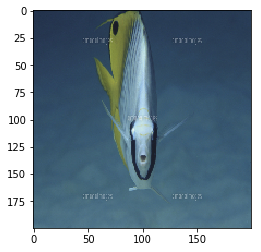

In [17]:
img = load_img("../data/originaldata/test2.jpg", target_size=(200, 200))
plt.imshow(img)

In [18]:
array = img_to_array(img)
array /= 255
x = np.expand_dims(array, axis=0)
pred = model.predict(x)
print(pred[0])
if pred[0] >= 0.5:
    print('トゲチョウチョウウオです')
else:
    print('チョウチョウウオです')

[0.78876984]
トゲチョウチョウウオです


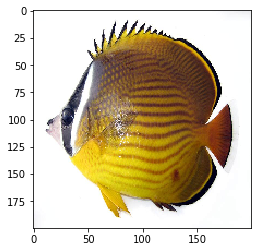

In [19]:
img = load_img("../data/originaldata/test3.jpg", target_size=(200, 200))
plt.imshow(img)

In [20]:
array = img_to_array(img)
array /= 255
x = np.expand_dims(array, axis=0)
pred = model.predict(x)
print(pred[0])
if pred[0] >= 0.5:
    print('トゲチョウチョウウオです')
else:
    print('チョウチョウウオです')

[0.03265465]
チョウチョウウオです
